In [1]:
import os as os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as st

In [2]:
happy_df = pd.read_csv(os.path.join('Data', 'TheHappyCo.csv'))
happy_score_df = happy_df[['Country name', 'Score Y20']]
print(happy_score_df)
happy_score_df.head()

Country name  Score Y20
0                     Finland     7.8087
1                     Denmark     7.6456
2                 Switzerland     7.5599
3                     Iceland     7.5045
4                      Norway     7.4880
..                        ...        ...
148  Central African Republic     3.4759
149                    Rwanda     3.3123
150                  Zimbabwe     3.2992
151               South Sudan     2.8166
152               Afghanistan     2.5669

[153 rows x 2 columns]


,Country name,Score Y20
0,Finland,7.8087
1,Denmark,7.6456
2,Switzerland,7.5599
3,Iceland,7.5045
4,Norway,7.4880


In [3]:
HappinessAlcoholConsumption_df = pd.read_csv(os.path.join('Resources','HappinessAlcoholConsumption.csv'))
HappinessAlcoholConsumption_df['Alcohol_PerCapita'] = HappinessAlcoholConsumption_df[['Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita']].sum(axis=1)
print(HappinessAlcoholConsumption_df.info())
HappinessAlcoholConsumption_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            122 non-null    object 
 1   Region             122 non-null    object 
 2   Hemisphere         122 non-null    object 
 3   HappinessScore     122 non-null    float64
 4   HDI                122 non-null    int64  
 5   GDP_PerCapita      122 non-null    float64
 6   Beer_PerCapita     122 non-null    int64  
 7   Spirit_PerCapita   122 non-null    int64  
 8   Wine_PerCapita     122 non-null    int64  
 9   Alcohol_PerCapita  122 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 9.7+ KB
None


,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Alcohol_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,583
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,565
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,372
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,369
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,493


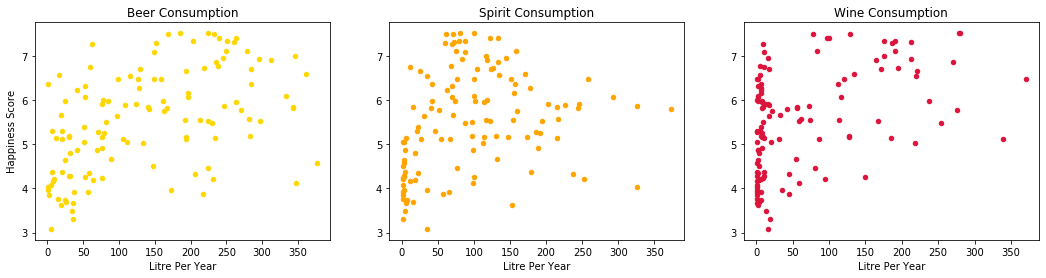

In [4]:

fg = plt.figure(figsize=(18,4))
ax1 = fg.add_subplot(131)
ax2 = fg.add_subplot(132)
ax3 = fg.add_subplot(133)
HappinessAlcoholConsumption_df.plot(kind='scatter',x='Beer_PerCapita',y='HappinessScore',ax=ax1,title='Beer Consumption',color='gold').set_xlabel('Litre Per Year')
ax1.set_ylabel('Happiness Score')
HappinessAlcoholConsumption_df.plot(kind='scatter',x='Spirit_PerCapita',y='HappinessScore',ax=ax2,title='Spirit Consumption',color='orange').set_xlabel('Litre Per Year')
ax2.set_ylabel('')
HappinessAlcoholConsumption_df.plot(kind='scatter',x='Wine_PerCapita',y='HappinessScore',ax=ax3,title='Wine Consumption',color='crimson').set_xlabel('Litre Per Year')
ax3.set_ylabel('');


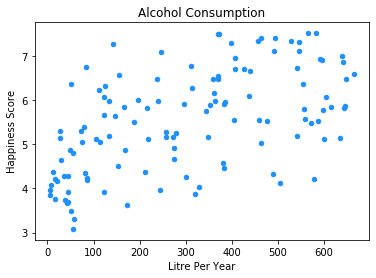

In [5]:
ax = HappinessAlcoholConsumption_df.plot(kind='scatter',x='Alcohol_PerCapita',y='HappinessScore',color='dodgerblue',marker='o',title='Alcohol Consumption')
ax.set_xlabel('Litre Per Year')
ax.set_ylabel('Happiness Score');

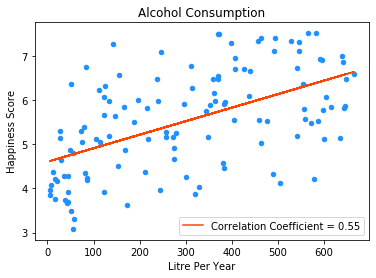

In [6]:
ln_rg = st.linregress(HappinessAlcoholConsumption_df['Alcohol_PerCapita'],HappinessAlcoholConsumption_df['HappinessScore'])
HappinessAlcoholConsumption_df['ln_rg'] = HappinessAlcoholConsumption_df['Alcohol_PerCapita'] * ln_rg.slope + ln_rg.intercept
label=f'Correlation Coefficient = {round(ln_rg.rvalue,2)}'
ax = HappinessAlcoholConsumption_df.plot(kind='scatter',x='Alcohol_PerCapita',y='HappinessScore',color='dodgerblue',marker='o',title='Alcohol Consumption')
HappinessAlcoholConsumption_df.plot(kind='line', ax=ax,x='Alcohol_PerCapita',y='ln_rg',color='orangered', label=label)
ax.set_xlabel('Litre Per Year')
ax.set_ylabel('Happiness Score');

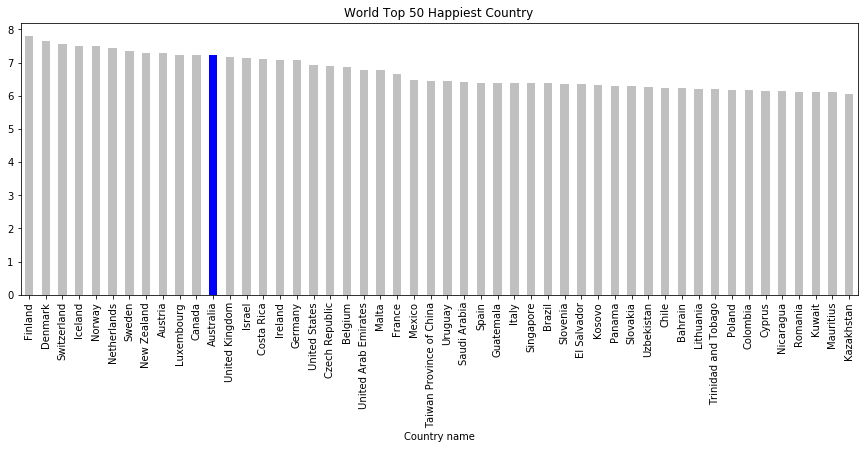

In [7]:
happy_50_df = happy_score_df.head(50)
happy_50_df = happy_50_df.dropna()
happy_50_df['au_color'] = 'silver'
happy_50_df.loc[happy_50_df['Country name']=='Australia','au_color'] = 'b'
happy_50_df.plot(kind='bar',x='Country name',y='Score Y20',color=happy_50_df['au_color'],title='World Top 50 Happiest Country',legend='',figsize=(15,5))

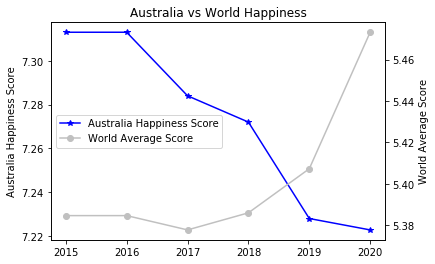

In [8]:
aussie_happy_df = happy_df[happy_df['Country name']=='Australia'][['Score Y15','Score Y16','Score Y17','Score Y18','Score Y19','Score Y20']]
world_happy_df = happy_df[['Score Y15','Score Y16','Score Y17','Score Y18','Score Y19','Score Y20']].mean()

ax_au = aussie_happy_df.T.plot.line(marker='*',color='b',label='Australia Happiness Score',title='Australia vs World Happiness')
ax_wd = world_happy_df.plot.line(ax=ax_au,marker='o',color='silver',label='World Average Score', secondary_y=True)

h_au, l_au = ax_au.get_legend_handles_labels()
h_wd, l_wd = ax_wd.get_legend_handles_labels()

ax_au.legend(h_au+h_wd, ['Australia Happiness Score','World Average Score'], loc='center left')
ax_au.set_xticklabels([0,'2015','2016','2017','2018','2019','2020'])
ax_au.set_ylabel('Australia Happiness Score')
ax_wd.set_ylabel('World Average Score')
ax_au.plot;

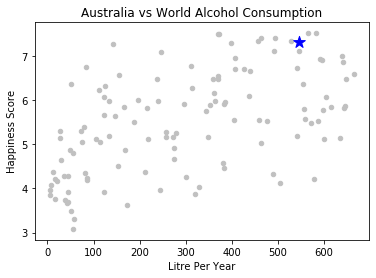

In [9]:
ax = HappinessAlcoholConsumption_df.plot(kind='scatter',x='Alcohol_PerCapita',y='HappinessScore',color='silver',marker='o',title='Australia vs World Alcohol Consumption')
au_HappinessAlcoholConsumption_df = HappinessAlcoholConsumption_df[HappinessAlcoholConsumption_df['Country']=='Australia']
au_HappinessAlcoholConsumption_df.plot(kind='scatter',ax=ax,x='Alcohol_PerCapita',y='HappinessScore',color='b',marker='*',s=150)
ax.set_xlabel('Litre Per Year')
ax.set_ylabel('Happiness Score');